<a href="https://colab.research.google.com/github/ninja03jod/Machine_Learning_Projects/blob/main/CaseStudy_IPL_2023DS_Model_To_Predict_StrikeRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'ipl-matchwise-scorecard-2008-2023:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4340416%2F7456690%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240123%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240123T173738Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0790442f30e704a57df116ec357b561d6f7bfdc3f06b10909c191f41375bc7d4b2948373986f611e01e8203896081a8fd93bf4bad10a63a0fcc15034b6a9bb5b786e74b25489a8f5c9a7a49d32ff3de3bed6f4d2133fe0504203ffaf4caa59a6a3fbf961de7756b79d8bc56cae6e69dadc716714294c61e9d490227a65f9f89d0e8326b4779c3d134f61a8b99d708e71de9ad834f2683cdbce98109df4473e2e43aa69e94d68a7978125e5c818feff772c276c825bb12a3ebdbb8309c62d04df6fc32e9f4f6182aa4a460e5be42702bf04c42e98777ef8dbea5c02d8e7bfef8a711da822542a4f4eae5d6053931cf81f4821a6f00a5d7db3bceb2d523a3e3e95'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-matchwise-scorecard-2008-2023/Dataset/bowling_summary.csv
/kaggle/input/ipl-matchwise-scorecard-2008-2023/Dataset/batting_summary.csv
/kaggle/input/ipl-matchwise-scorecard-2008-2023/Dataset/match_summary.csv
/kaggle/input/ipl-matchwise-scorecard-2008-2023/Dataset/2020/match_summary_2020.csv
/kaggle/input/ipl-matchwise-scorecard-2008-2023/Dataset/2020/bowling_summary_2020.csv
/kaggle/input/ipl-matchwise-scorecard-2008-2023/Dataset/2020/batting_summary_2020.csv
/kaggle/input/ipl-matchwise-scorecard-2008-2023/Dataset/2012/batting_summary_2012.csv
/kaggle/input/ipl-matchwise-scorecard-2008-2023/Dataset/2012/match_summary_2012.csv
/kaggle/input/ipl-matchwise-scorecard-2008-2023/Dataset/2012/bowling_summary_2012.csv
/kaggle/input/ipl-matchwise-scorecard-2008-2023/Dataset/2017/bowling_summary_2017.csv
/kaggle/input/ipl-matchwise-scorecard-2008-2023/Dataset/2017/batting_summary_2017.csv
/kaggle/input/ipl-matchwise-scorecard-2008-2023/Dataset/2017/match_summary_2017.csv
/kaggl

In [ ]:
df = pd.read_csv("/kaggle/input/ipl-matchwise-scorecard-2008-2023/Dataset/batting_summary.csv")
df

,IPL Edition,Date,Time,Stadium,City,Match Details,Team 1,Team 2,Team Batting,Total Runs,Total Wickets,Batsman Names,Out/Not Out,Balls Played,Runs Scored,Fours,Sixes,Strike Rate
0,2023,2023-03-31,07:30 PM,Narendra Modi Stadium,Ahmedabad,"Gujarat Titans vs Chennai Super Kings, 1st Match",Gujarat Titans,Chennai Super Kings,Chennai Super Kings Innings,178,7,Conway,b Shami,6.0,1,0.0,0.0,16.67
1,2023,2023-03-31,07:30 PM,Narendra Modi Stadium,Ahmedabad,"Gujarat Titans vs Chennai Super Kings, 1st Match",Gujarat Titans,Chennai Super Kings,Chennai Super Kings Innings,178,7,Ruturaj Gaikwad,c Shubman Gill b Alzarri Joseph,50.0,92,4.0,9.0,184.00
2,2023,2023-03-31,07:30 PM,Narendra Modi Stadium,Ahmedabad,"Gujarat Titans vs Chennai Super Kings, 1st Match",Gujarat Titans,Chennai Super Kings,Chennai Super Kings Innings,178,7,Moeen,c W Saha b Rashid Khan,17.0,23,4.0,1.0,135.29
3,2023,2023-03-31,07:30 PM,Narendra Modi Stadium,Ahmedabad,"Gujarat Titans vs Chennai Super Kings, 1st Match",Gujarat Titans,Chennai Super Kings,Chennai Super Kings Innings,178,7,Stokes,c W Saha b Rashid Khan,6.0,7,1.0,0.0,116.67
4,2023,2023-03-31,07:30 PM,Narendra Modi Stadium,Ahmedabad,"Gujarat Titans vs Chennai Super Kings, 1st Match",Gujarat Titans,Chennai Super Kings,Chennai Super Kings Innings,178,7,Rayudu,b Joshua Little,12.0,12,0.0,1.0,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15078,2008,2008-06-01,08:15 PM,Dr DY Patil Sports Academy,Mumbai,"Chennai Super Kings vs Rajasthan Royals, Final",Chennai Super Kings,Rajasthan Royals,Rajasthan Royals Innings,164,7,Yusuf Pathan,run out (Raina),39.0,56,3.0,4.0,143.59
15079,2008,2008-06-01,08:15 PM,Dr DY Patil Sports Academy,Mumbai,"Chennai Super Kings vs Rajasthan Royals, Final",Chennai Super Kings,Rajasthan Royals,Rajasthan Royals Innings,164,7,Mohammad Kaif,c Dhoni b Muralitharan,9.0,12,0.0,1.0,133.33
15080,2008,2008-06-01,08:15 PM,Dr DY Patil Sports Academy,Mumbai,"Chennai Super Kings vs Rajasthan Royals, Final",Chennai Super Kings,Rajasthan Royals,Rajasthan Royals Innings,164,7,Ravindra Jadeja,c Kapugedera b Morkel,1.0,0,0.0,0.0,0.00
15081,2008,2008-06-01,08:15 PM,Dr DY Patil Sports Academy,Mumbai,"Chennai Super Kings vs Rajasthan Royals, Final",Chennai Super Kings,Rajasthan Royals,Rajasthan Royals Innings,164,7,Shane Warne,not out,9.0,9,1.0,0.0,100.00


In [ ]:
# Each player data is provided and strike rate also:
# lets look at some dataset info
print(f'Total records in rows and columns are:{df.shape}\n')
print(f"The columns are:\n{df.columns}\n")
print(f"Total columns are:{df.shape[1]}\n")
print(f"Categorical columns:\n{df.select_dtypes(include=object).columns}\n")
print('*'*170)

# lets check the data type and and non null and null values avail in data set:
print("Info:\n")
print(f"{df.info()}\n\n")
print(f"Null Values:\n{df.isnull().sum()}")
print("*"*170)

Total records in rows and columns are:(15083, 18)

The columns are:
Index(['IPL Edition', 'Date', 'Time', 'Stadium', 'City', 'Match Details',
       'Team 1', 'Team 2', 'Team Batting', 'Total Runs', 'Total Wickets',
       'Batsman Names', 'Out/Not Out', 'Balls Played', 'Runs Scored', 'Fours',
       'Sixes', 'Strike Rate'],
      dtype='object')

Total columns are:18

Categorical columns:
Index(['Date', 'Time', 'Stadium', 'City', 'Match Details', 'Team 1', 'Team 2',
       'Team Batting', 'Batsman Names', 'Out/Not Out', 'Runs Scored'],
      dtype='object')

**************************************************************************************************************************************************************************
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15083 entries, 0 to 15082
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IPL Edition    15083 non-null  int64  
 1   Date      

# ***Perform data Preprocessing:***

In [ ]:
# Space available in columns lets fix it first:
df.columns = df.columns.str.replace(" ","_")
df.columns

Index(['IPL_Edition', 'Date', 'Time', 'Stadium', 'City', 'Match_Details',
       'Team_1', 'Team_2', 'Team_Batting', 'Total_Runs', 'Total_Wickets',
       'Batsman_Names', 'Out/Not_Out', 'Balls_Played', 'Runs_Scored', 'Fours',
       'Sixes', 'Strike_Rate'],
      dtype='object')

In [ ]:
# Lets deal with nan values:
df[df.Batsman_Names.isnull()]
df.Batsman_Names = df.Batsman_Names.fillna("Not Specified")

In [ ]:
df.rename(columns={'Out/Not_Out':'Out_or_Not'},inplace=True)

In [ ]:
# here we have dtypoe for numerical data is in object for runs scored
df['Runs_Scored'].values

# lets convert them into numeric
df.Runs_Scored = pd.to_numeric(df['Runs_Scored'],errors="coerce")
df['Runs_Scored'].values

array([ 1., 92., 23., ...,  0.,  9.,  9.])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15083 entries, 0 to 15082
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IPL_Edition    15083 non-null  int64  
 1   Date           15083 non-null  object 
 2   Time           15083 non-null  object 
 3   Stadium        15083 non-null  object 
 4   City           15083 non-null  object 
 5   Match_Details  15083 non-null  object 
 6   Team_1         15083 non-null  object 
 7   Team_2         15083 non-null  object 
 8   Team_Batting   15083 non-null  object 
 9   Total_Runs     15083 non-null  int64  
 10  Total_Wickets  15083 non-null  int64  
 11  Batsman_Names  15083 non-null  object 
 12  Out_or_Not     14810 non-null  object 
 13  Balls_Played   14824 non-null  float64
 14  Runs_Scored    14804 non-null  float64
 15  Fours          14808 non-null  float64
 16  Sixes          14819 non-null  float64
 17  Strike_Rate    14820 non-null  float64
dtypes: flo

In [ ]:
df.Out_or_Not = df.Out_or_Not.fillna("not out")
df.Runs_Scored = df.Runs_Scored.fillna(0.0)
df.Balls_Played = df.Balls_Played.fillna(1.0)
df.Fours = df.Fours.fillna(0)
df.Sixes = df.Sixes.fillna(0)
df.Strike_Rate = df.Strike_Rate.fillna(0)

In [ ]:
df.isnull().sum()

IPL_Edition      0
Date             0
Time             0
Stadium          0
City             0
Match_Details    0
Team_1           0
Team_2           0
Team_Batting     0
Total_Runs       0
Total_Wickets    0
Batsman_Names    0
Out_or_Not       0
Balls_Played     0
Runs_Scored      0
Fours            0
Sixes            0
Strike_Rate      0
dtype: int64

In [ ]:
# lets do feature engineering for date and time
# convert Time into hours,day of week
df['Date'] = pd.to_datetime(df['Date'])

df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day

In [ ]:
df.drop(columns=['Date','DayOfWeek'],inplace=True)

In [ ]:
# lets take veiwe on first 5 record
df.head()

,IPL_Edition,Time,Stadium,City,Match_Details,Team_1,Team_2,Team_Batting,Total_Runs,Total_Wickets,Batsman_Names,Out_or_Not,Balls_Played,Runs_Scored,Fours,Sixes,Strike_Rate,Month,Year,Day
0,2023,07:30 PM,Narendra Modi Stadium,Ahmedabad,"Gujarat Titans vs Chennai Super Kings, 1st Match",Gujarat Titans,Chennai Super Kings,Chennai Super Kings Innings,178,7,Conway,b Shami,6.0,1.0,0.0,0.0,16.67,3,2023,31
1,2023,07:30 PM,Narendra Modi Stadium,Ahmedabad,"Gujarat Titans vs Chennai Super Kings, 1st Match",Gujarat Titans,Chennai Super Kings,Chennai Super Kings Innings,178,7,Ruturaj Gaikwad,c Shubman Gill b Alzarri Joseph,50.0,92.0,4.0,9.0,184.00,3,2023,31
2,2023,07:30 PM,Narendra Modi Stadium,Ahmedabad,"Gujarat Titans vs Chennai Super Kings, 1st Match",Gujarat Titans,Chennai Super Kings,Chennai Super Kings Innings,178,7,Moeen,c W Saha b Rashid Khan,17.0,23.0,4.0,1.0,135.29,3,2023,31
3,2023,07:30 PM,Narendra Modi Stadium,Ahmedabad,"Gujarat Titans vs Chennai Super Kings, 1st Match",Gujarat Titans,Chennai Super Kings,Chennai Super Kings Innings,178,7,Stokes,c W Saha b Rashid Khan,6.0,7.0,1.0,0.0,116.67,3,2023,31
4,2023,07:30 PM,Narendra Modi Stadium,Ahmedabad,"Gujarat Titans vs Chennai Super Kings, 1st Match",Gujarat Titans,Chennai Super Kings,Chennai Super Kings Innings,178,7,Rayudu,b Joshua Little,12.0,12.0,0.0,1.0,100.00,3,2023,31


# ***Data Visualization***

In [ ]:
# importing libraries for data visualization:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Matches Done in Stadiums')

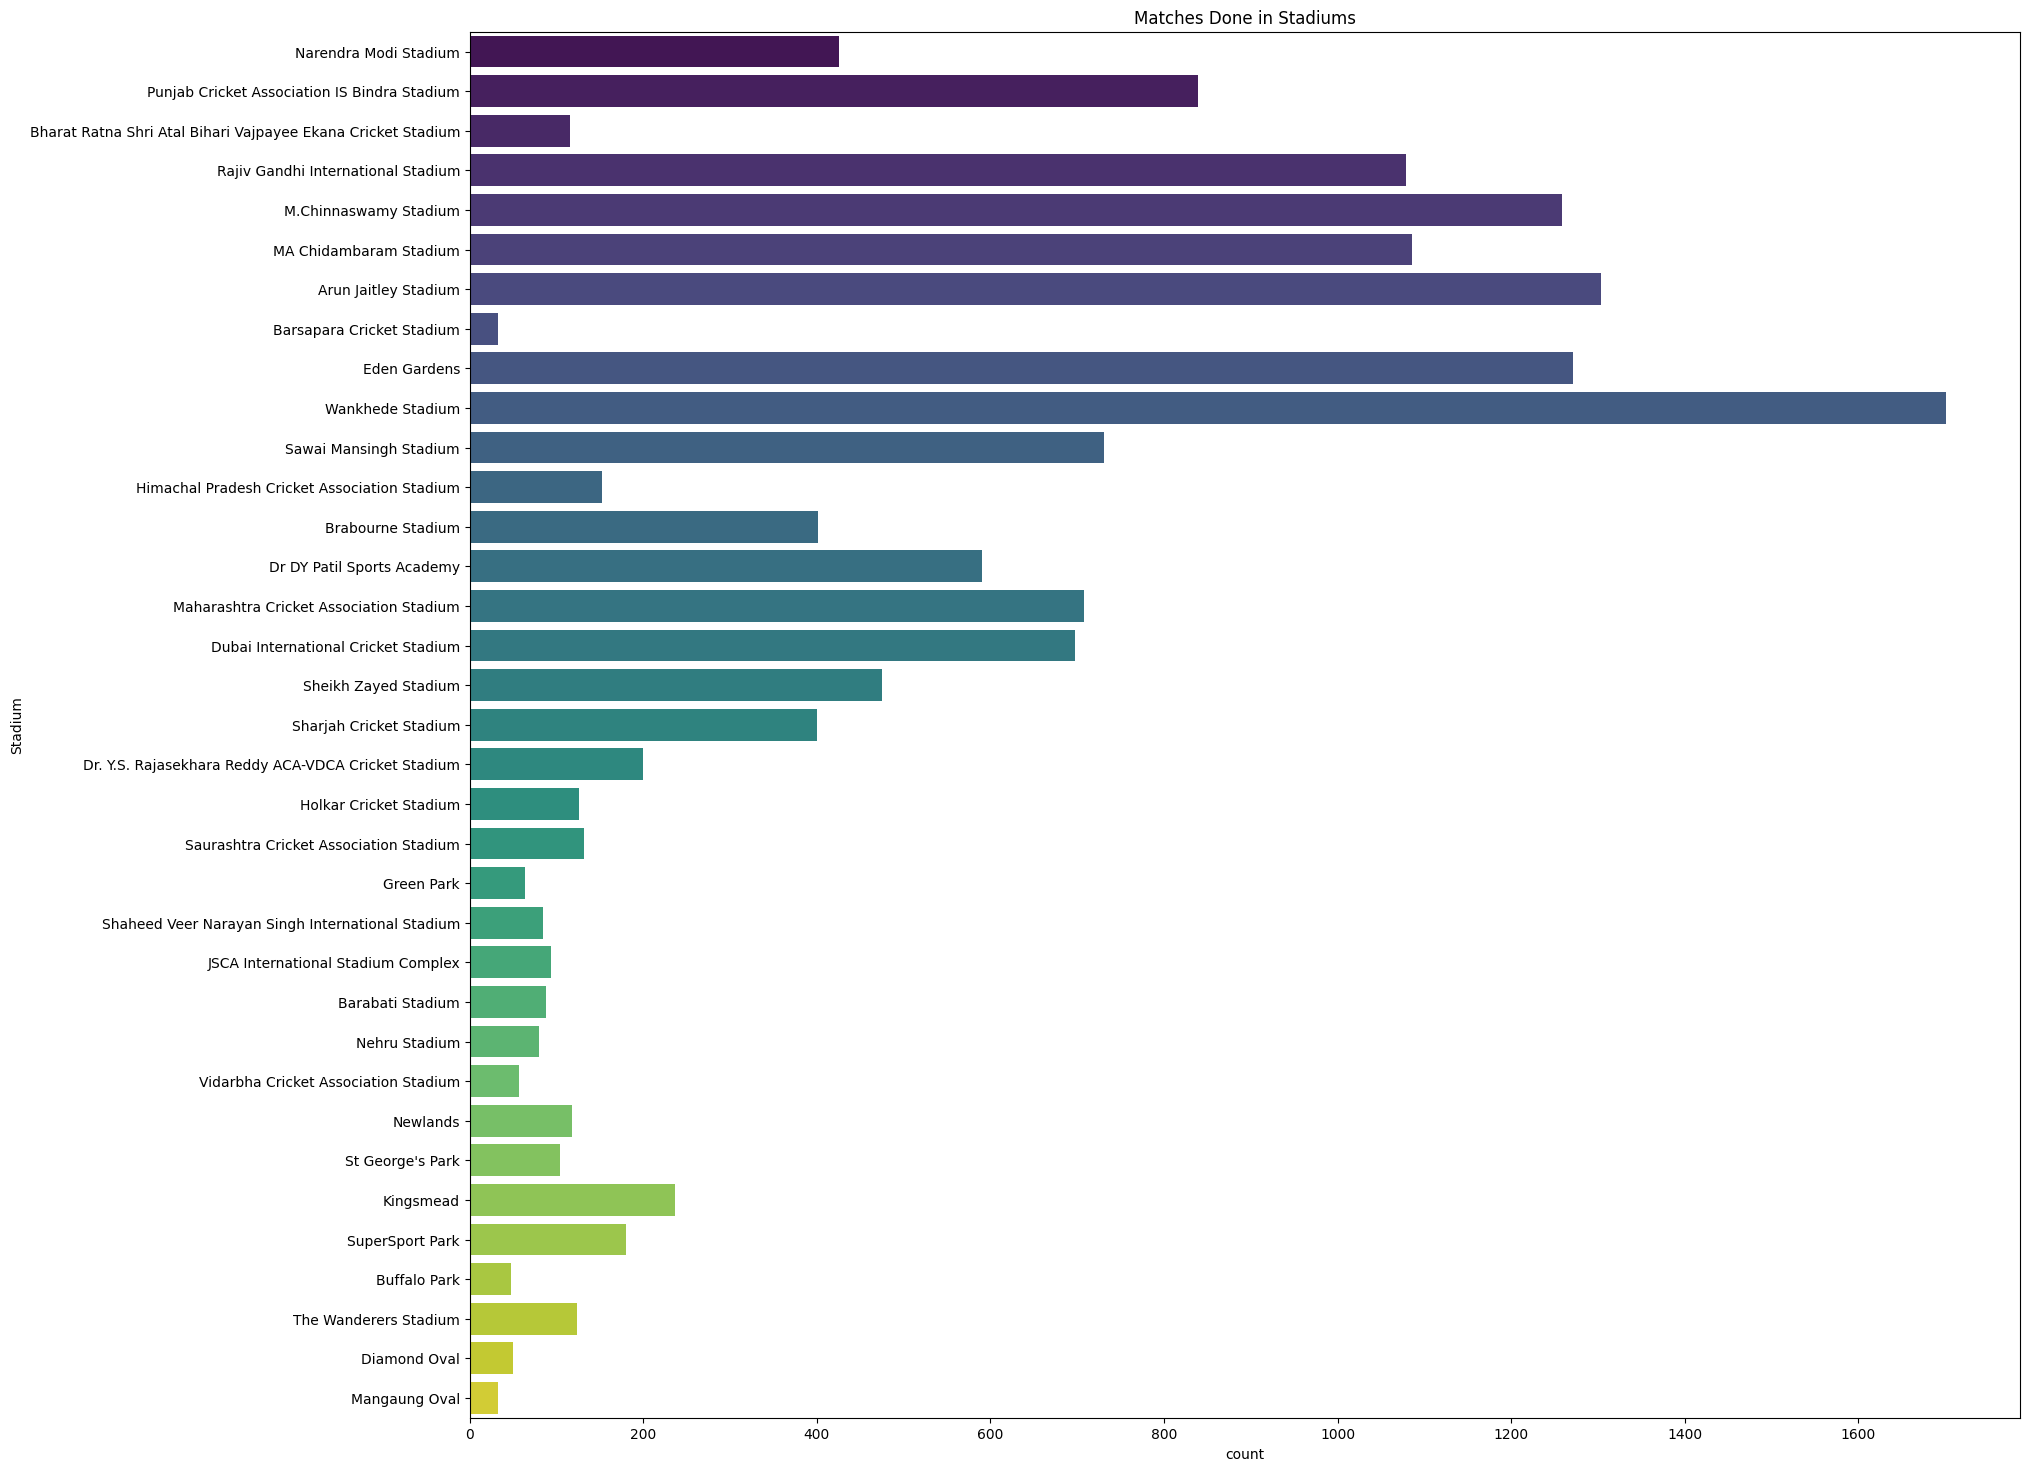

In [ ]:
# lets see most matches done in which Stadium
plt.figure(figsize=(20,18))
sns.countplot(data=df,y="Stadium",palette="viridis")
plt.title("Matches Done in Stadiums")

In [ ]:
# most matches done in which staduim
#df.groupby('Stadium').count().max()[['Time']]
df.Stadium.value_counts()

Stadium
Wankhede Stadium                                                1701
Arun Jaitley Stadium                                            1303
Eden Gardens                                                    1271
M.Chinnaswamy Stadium                                           1258
MA Chidambaram Stadium                                          1086
Rajiv Gandhi International Stadium                              1079
Punjab Cricket Association IS Bindra Stadium                     839
Sawai Mansingh Stadium                                           731
Maharashtra Cricket Association Stadium                          708
Dubai International Cricket Stadium                              697
Dr DY Patil Sports Academy                                       590
Sheikh Zayed Stadium                                             475
Narendra Modi Stadium                                            426
Brabourne Stadium                                                401
Sharjah Cricket Stadium   

293598

233191

[Text(0, 0, '293598'), Text(0, 0, '233191')]

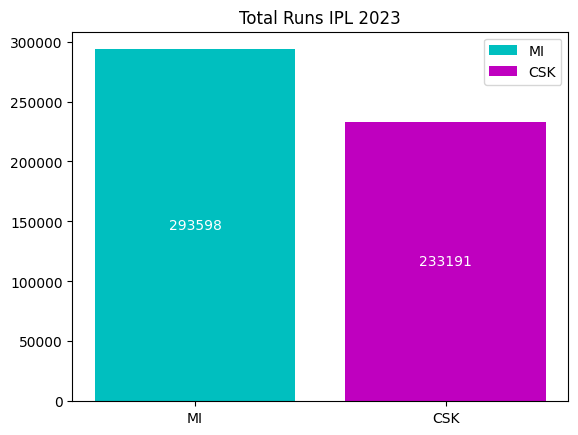

In [ ]:
# lets show by plotting which team does most runs in wankhede stadium:
Mi = df[df.Team_1 == "Mumbai Indians"]['Total_Runs'].sum()
Csk = df[df.Team_2 == "Chennai Super Kings"]['Total_Runs'].sum()
display(Mi,Csk)
bar = plt.bar(["MI","CSK"],[Mi,Csk],color=['c','m'],label=["MI","CSK"])
plt.legend()
plt.title("Total Runs IPL 2023")
plt.bar_label(bar,label_type="center",color="white")

Text(0.5, 1.0, 'Most Runs Scored By Each Team from 2008 to 2023')

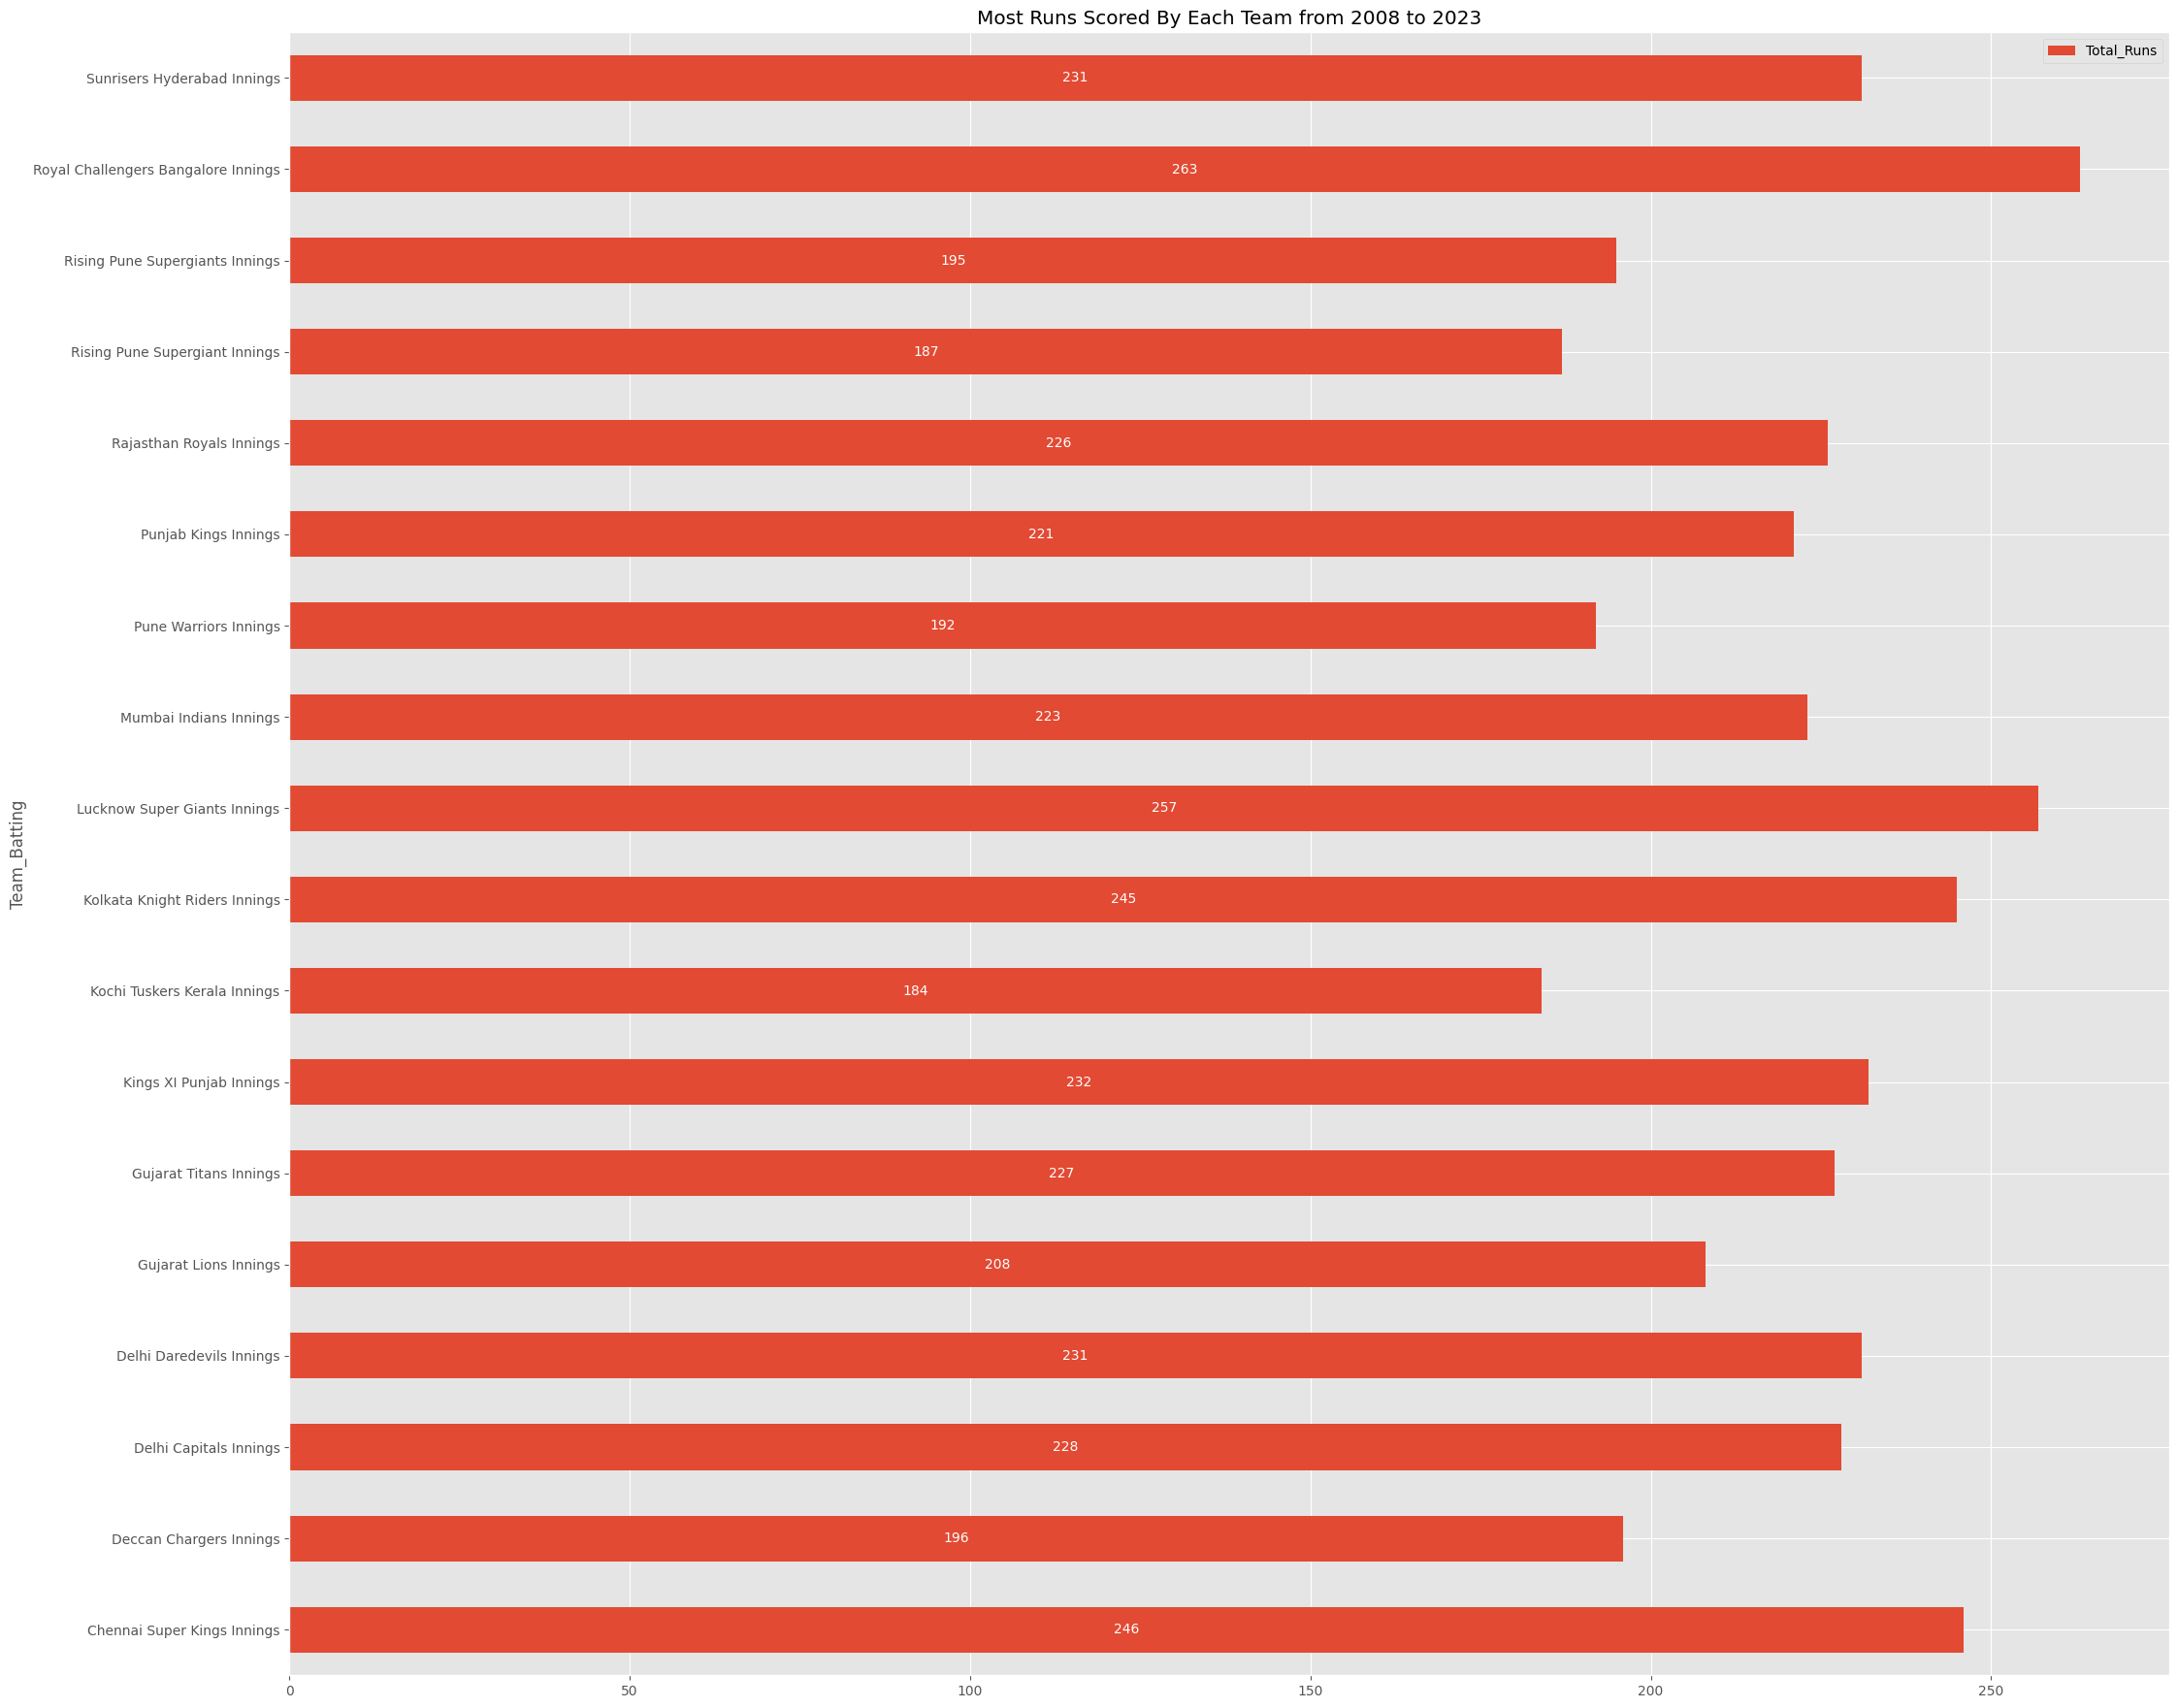

In [ ]:
# Teams who scored max runs:
plt.style.use("ggplot")
bar = df.groupby("Team_Batting")[['Total_Runs']].max().plot.barh(figsize=(25,22))
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Most Runs Scored By Each Team from 2008 to 2023")

Text(0.5, 1.0, 'Players Who Hits More Sixes In IPL 2023')

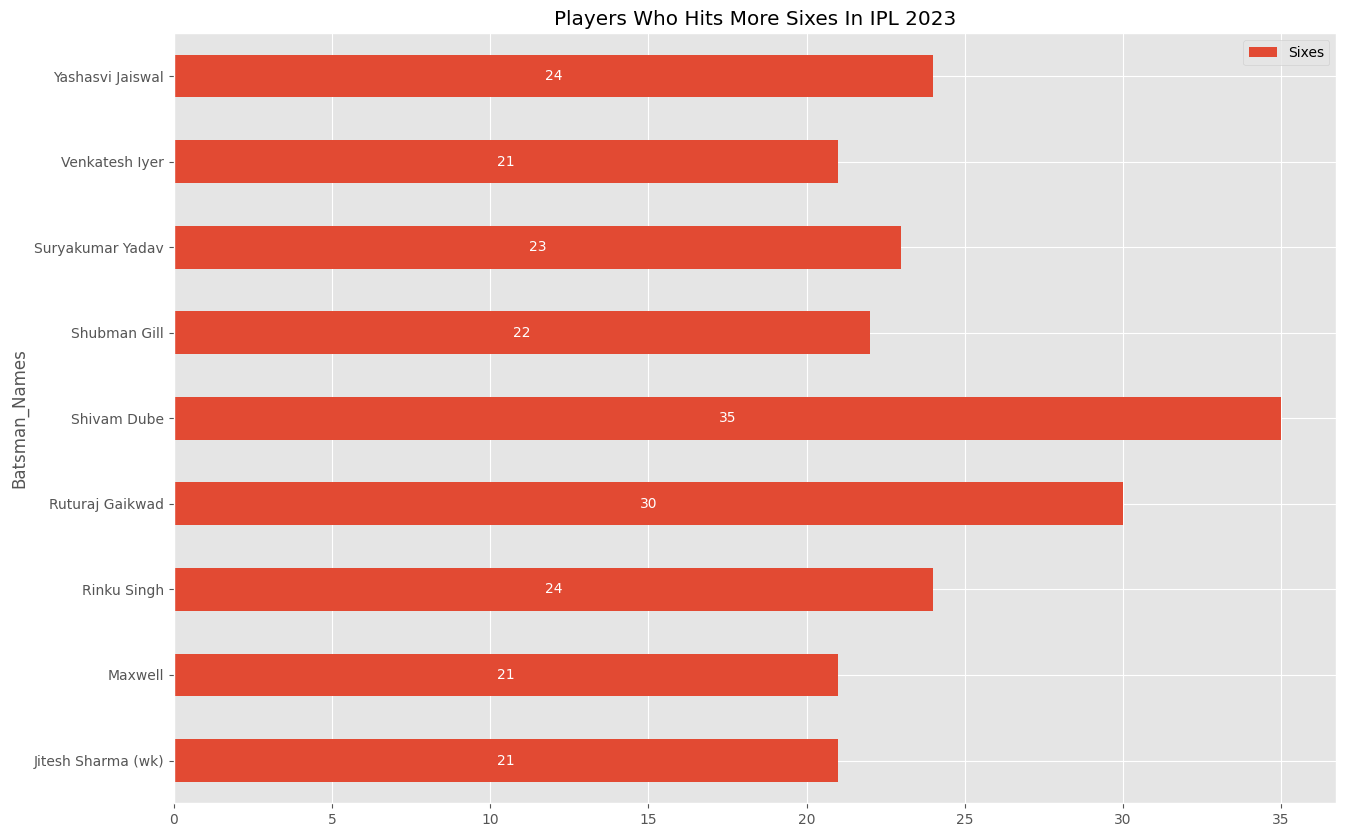

In [ ]:
# Players who hits more tan 20 sixes in IPL 2023:
df_2023 = df[df.Year == 2023]

player_names = df_2023.groupby("Batsman_Names")[['Sixes']].sum()

player_hits_more_than_50_six = player_names[player_names.Sixes > 20]
bar = player_hits_more_than_50_six.plot.barh(figsize=(15,10))
plt.bar_label(bar.containers[0],label_type="center",color="white")
plt.title("Players Who Hits More Sixes In IPL 2023")

Text(0.5, 1.0, 'Players Who Hits Most Sixes From 2008 - 2023')

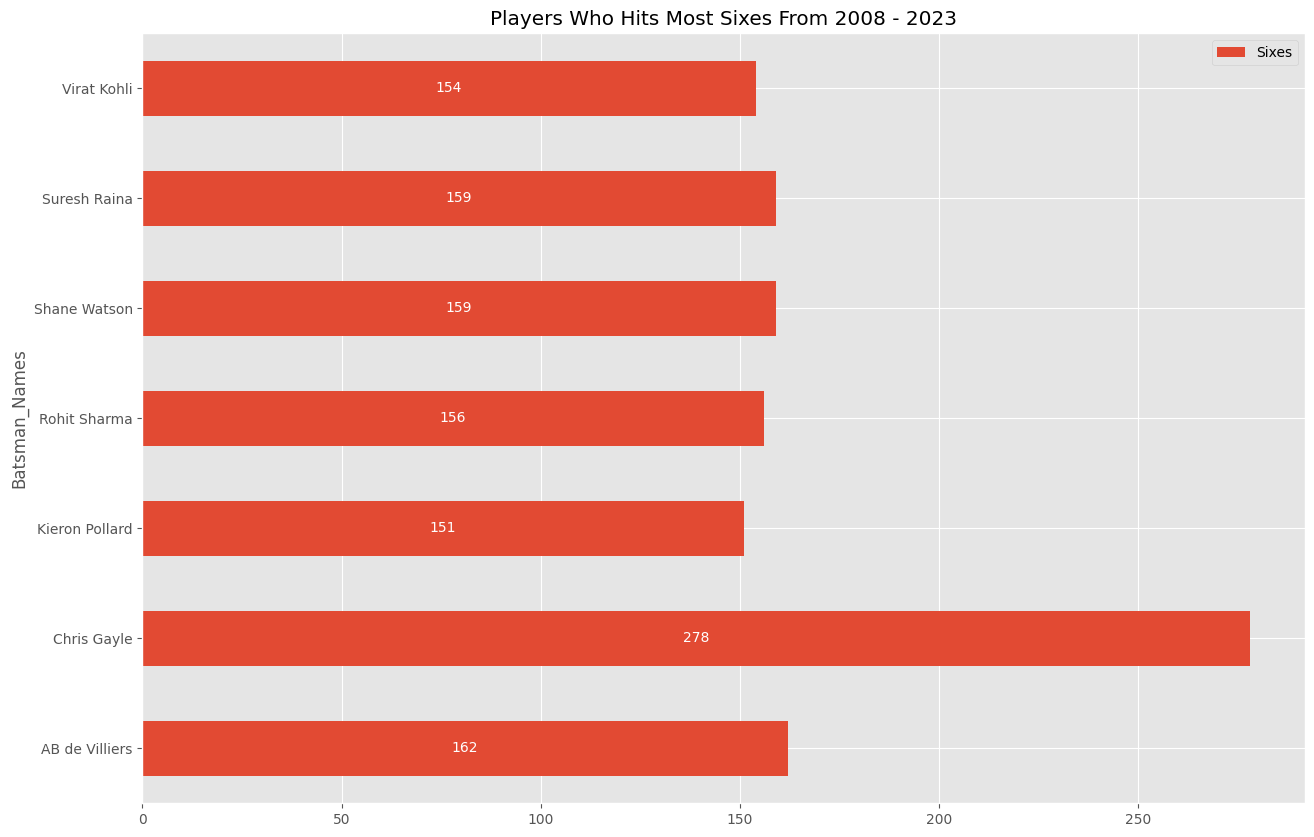

In [ ]:
# players who hits sixes more than 150 in IPL from 2008 - 2023
df_six = df.groupby("Batsman_Names")[['Sixes']].sum()
most_six = df_six[df_six.Sixes > 150]
bar = most_six.plot.barh(figsize=(15,10))
plt.bar_label(bar.containers[0],label_type="center",color="white")
plt.title("Players Who Hits Most Sixes From 2008 - 2023")

In [ ]:
# Most sixes from 2008 to 2023
df_six = df.groupby("Batsman_Names")[['Sixes']].sum()
most_six = df_six.Sixes.max()
print(f"Most sixes in IPL history:{most_six}")

Most sixes in IPL history:278.0


Most runs in IPL 2023:Runs_Scored    761.0
dtype: float64



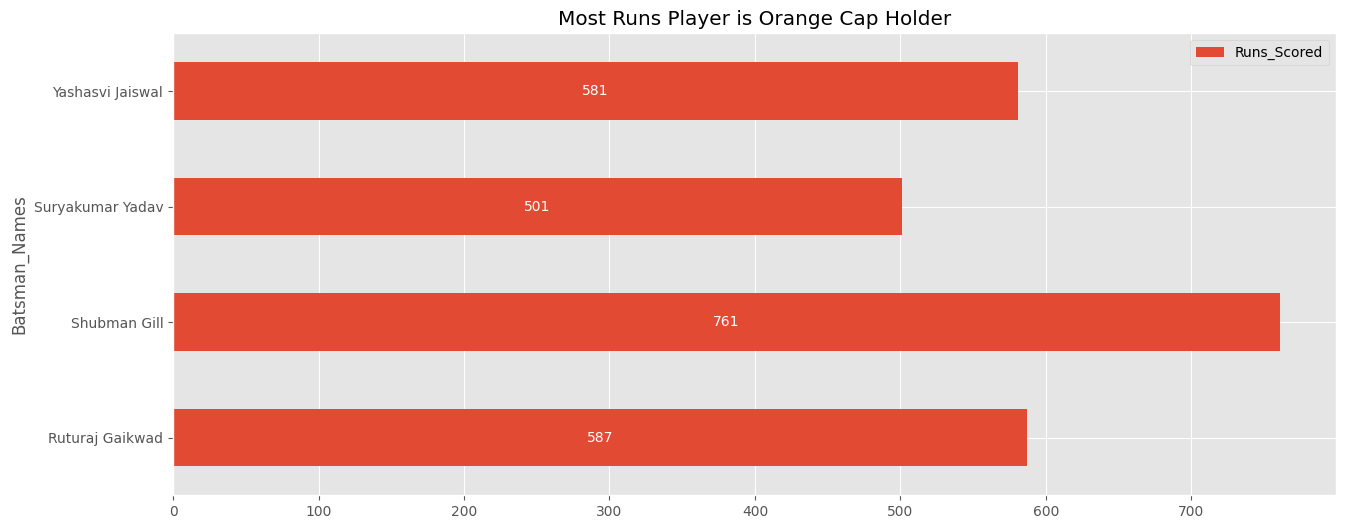

**************************************************************************************************************************************************************************
Player names who scored:
['Venkatesh Iyer' 'Yashasvi Jaiswal' 'Suryakumar Yadav' 'Prabhsimran'
 'Shubman Gill' 'Klaasen (wk)' 'Virat Kohli' 'Cameron Green' 'Kohli'
 'Shubman Gill']

Player index who scored:
Index([336, 638, 865, 893, 945, 995, 999, 1062, 1064, 1072], dtype='int64')




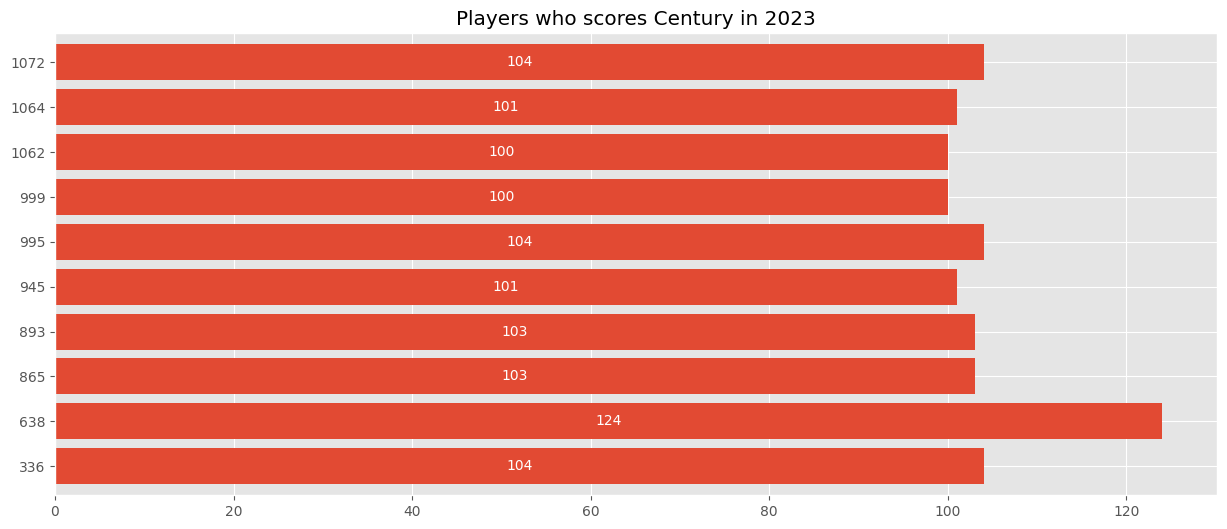

**************************************************************************************************************************************************************************


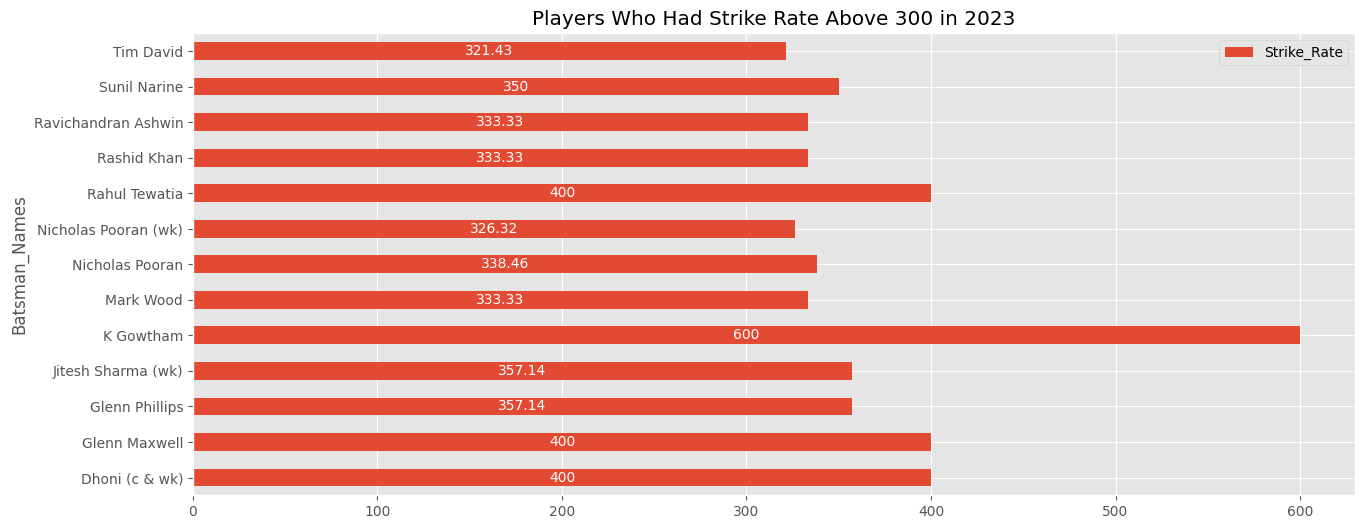

In [ ]:
# Players who scored most runs in 2023:
df_2023 = df[df.Year == 2023]

df_runs = df_2023.groupby("Batsman_Names")[["Runs_Scored"]].sum()

# see which player will gets the orange cap:
players = df_runs.max()
print(f"Most runs in IPL 2023:{players}\n")

player_names = df_runs[df_runs.Runs_Scored > 500]
new = player_names.plot.barh(figsize=(15,6))
plt.bar_label(new.containers[0],label_type="center",color="white")
plt.title("Most Runs Player is Orange Cap Holder")
plt.show()
print("*"*170)
# lets see the players who hits more than 100 runs in 2023:

df1_2023 = df[df.Year == 2023]

df_Runs = df1_2023[df1_2023.Runs_Scored >= 100]

# lets get the batsman names who scored more than 100
df_player_names = df_Runs.Batsman_Names
print(f"Player names who scored:\n{df_player_names.values}\n")
print(f"Player index who scored:\n{df_player_names.index}\n\n")

b = df_Runs.Runs_Scored.plot.barh(width=0.8,figsize=(15,6));
plt.bar_label(b.containers[0],label_type="center",color="white");
plt.title("Players who scores Century in 2023")
plt.show()
print("*"*170)
# players with strike rate above 300 in 2023:
df2_2023 = df[df.Year == 2023]

df_str = df2_2023.groupby("Batsman_Names")[["Strike_Rate"]].max()
df_str = df_str[df_str.Strike_Rate > 300]
b2 = df_str.plot.barh(figsize=(15,6))
plt.bar_label(b2.containers[0],label_type="center",color="white")
plt.title("Players Who Had Strike Rate Above 300 in 2023")
plt.show()

In [ ]:
# lets see the numerical and categorical columns:
cat_col = df.select_dtypes(include = object)
num_col = df.select_dtypes([int,float])
display(cat_col.columns,"\n",num_col.columns,"\n\n")

# we can fetch both categorical and numerical columns by pyhton approach
ca_col = [i for i in df.columns if df[i].dtypes == "O"]

nm_col = [i for i in df.columns if i not in ca_col]
print(ca_col,"\n",nm_col)

Index(['Time', 'Stadium', 'City', 'Match_Details', 'Team_1', 'Team_2',
       'Team_Batting', 'Batsman_Names', 'Out_or_Not'],
      dtype='object')

'\n'

Index(['IPL_Edition', 'Total_Runs', 'Total_Wickets', 'Balls_Played',
       'Runs_Scored', 'Fours', 'Sixes', 'Strike_Rate', 'Month', 'Year', 'Day'],
      dtype='object')

'\n\n'

['Time', 'Stadium', 'City', 'Match_Details', 'Team_1', 'Team_2', 'Team_Batting', 'Batsman_Names', 'Out_or_Not'] 
 ['IPL_Edition', 'Total_Runs', 'Total_Wickets', 'Balls_Played', 'Runs_Scored', 'Fours', 'Sixes', 'Strike_Rate', 'Month', 'Year', 'Day']


In [ ]:
def hist_box_plots(data,col,bins="auto"):
    fig,axis = plt.subplots(ncols=2,figsize=(11,3))

    sns.histplot(data=data,x=col,bins=bins,ax=axis[0],kde=True)
    sns.boxplot(data=data,x=col,ax=axis[1])

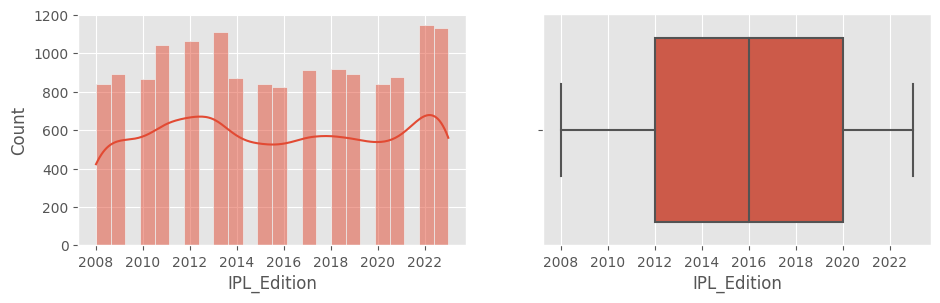

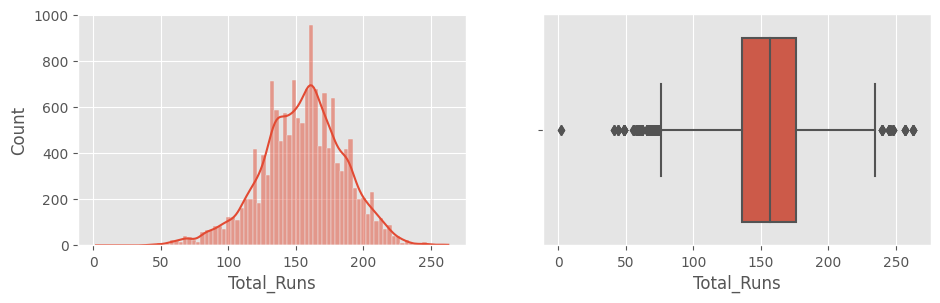

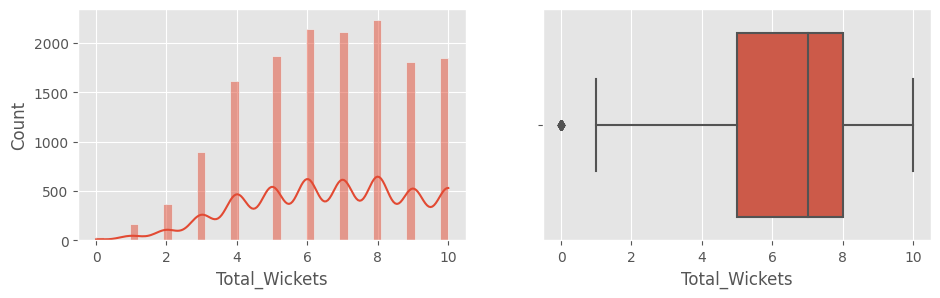

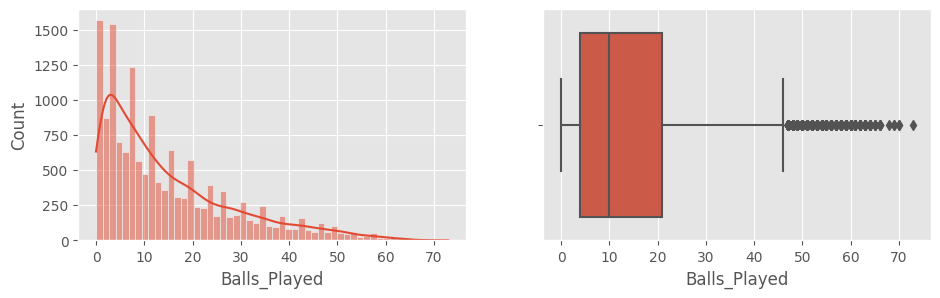

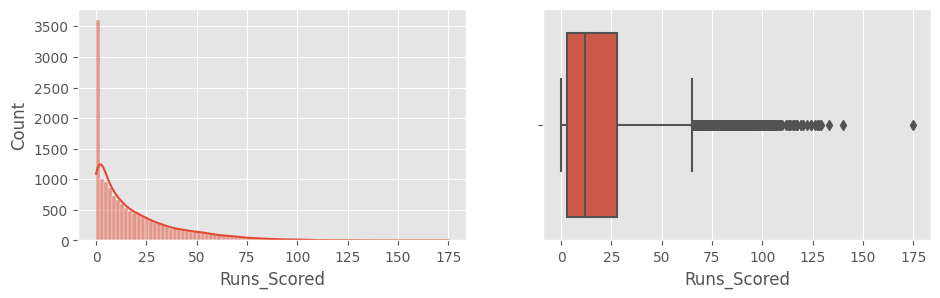

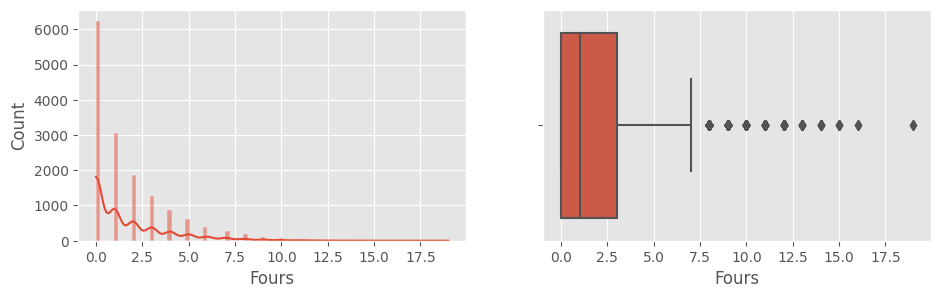

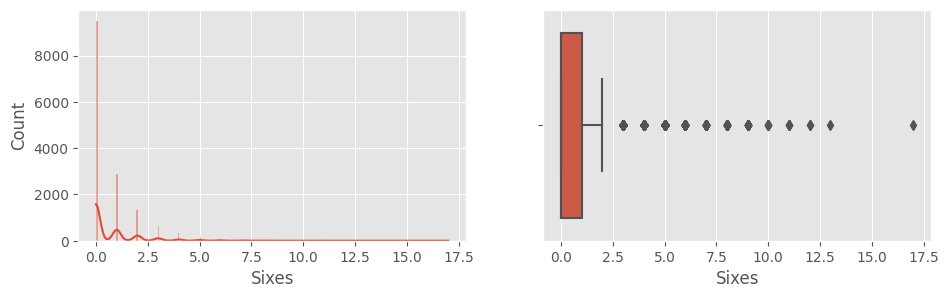

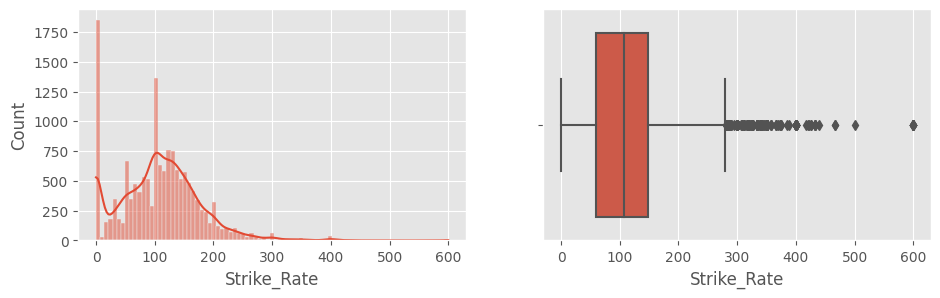

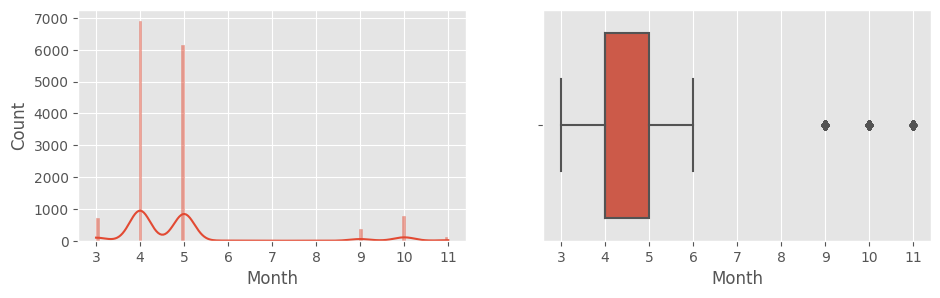

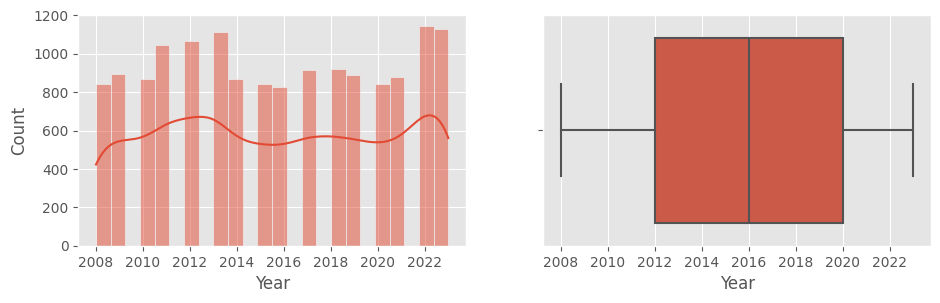

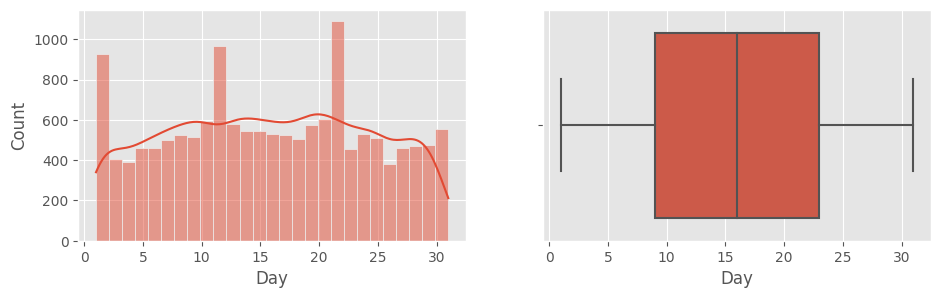

In [ ]:
for col in num_col.columns:
    hist_box_plots(num_col,col)

Text(0.5, 1.0, 'Less Runs Scored by Teams in 2023')

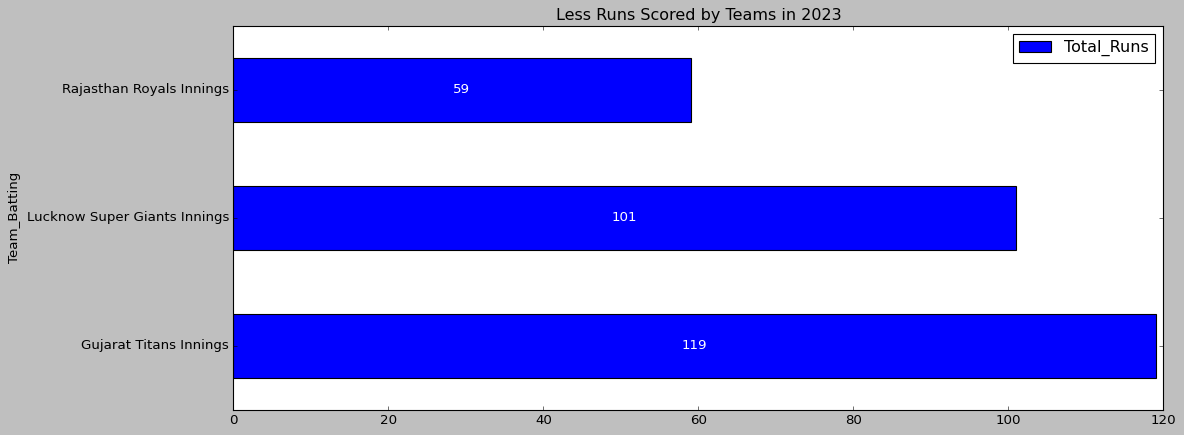

In [ ]:
# which Team performance very low in 2023:
plt.style.use("classic")
df_2023 = df[df.Year == 2023]

df_per = df_2023.groupby("Team_Batting")[["Total_Runs"]].min()
df_per = df_per[df_per.Total_Runs <= 120]

b = df_per.plot.barh(figsize=(15,6))
plt.bar_label(b.containers[0],label_type="center",color="white")
plt.title("Less Runs Scored by Teams in 2023")

In [ ]:
# import libraries to predicting the strike rate according to batsman runs:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
X = df[["Balls_Played","Runs_Scored"]]
y = df['Strike_Rate']
display(X,y)

,Balls_Played,Runs_Scored
0,6.0,1.0
1,50.0,92.0
2,17.0,23.0
3,6.0,7.0
4,12.0,12.0
...,...,...
15078,39.0,56.0
15079,9.0,12.0
15080,1.0,0.0
15081,9.0,9.0


0         16.67
1        184.00
2        135.29
3        116.67
4        100.00
          ...  
15078    143.59
15079    133.33
15080      0.00
15081    100.00
15082    128.57
Name: Strike_Rate, Length: 15083, dtype: float64

# ***Modeling***

In [ ]:
model = LinearRegression()
model

LinearRegression()

# ***Data Splitting***

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
# here 70 % data will be train and remaining 30 % data will be test

In [ ]:
print(f"Total length is: {len(X)}\n")
print(f"70 % of Total data is: {len(X)*0.7}")
print(f"30 % data is in testing: {len(y)*0.3}")
print(f"After splitting the data:\n")
print(f"We are getting same Training Data will be 70 %: {x_train.shape[0]}")
print(f"Testing data is 30% of Total Data: {x_test.shape[0]}")

Total length is: 15083

70 % of Total data is: 10558.099999999999
30 % data is in testing: 4524.9
After splitting the data:

We are getting same Training Data will be 70 %: 10558
Testing data is 30% of Total Data: 4525


In [ ]:
# trainig the model
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# testing:
y_pred = model.predict(x_test)
y_pred

array([ 89.7660089 , 103.51881644, 175.85016317, ..., 110.51836588,
       109.89071449,  86.96141992])

In [ ]:
# Actual data is:
y_test.values

array([100.  , 133.33, 211.76, ..., 233.33, 129.41,  66.67])

# ***Performance Measuress***

In [ ]:
mean_squared_error(y_test,y_pred)

2870.5964039385067

In [ ]:
# root mean square
np.sqrt(mean_squared_error(y_test,y_pred))

53.57794699256875

In [ ]:
# mean absolute error:
mean_absolute_error(y_test,y_pred)

36.23960336465009

In [ ]:
test = [[6,12],[10,29],[20,33],[36,49],[50,72],[66,100]]

In [ ]:
y2_pred = model.predict(test)
y2_pred

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([118.79706413, 178.51968346, 146.4377479 , 140.33598724,
       177.39944938, 227.83435902])

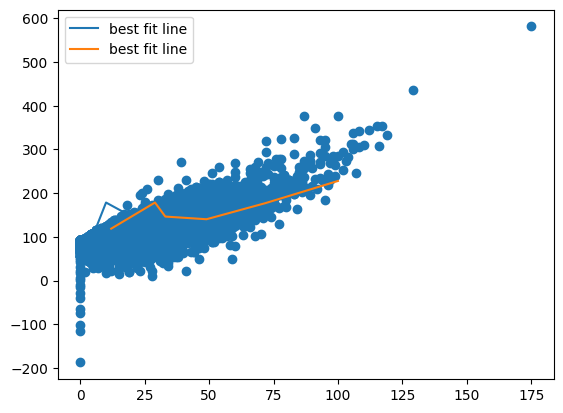

In [ ]:
# lets see the relation between independent and dependent variables:
plt.plot(test,y2_pred,label="best fit line")
plt.legend()
plt.scatter(x_test.Runs_Scored,y_pred)